In [160]:
from imblearn.over_sampling  import RandomOverSampler, SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import scikitplot as skplt
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

In [161]:
d = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_train_data_rpkm.csv',index_col=0)
d_info = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_train_info_2.csv',index_col=0)
d2_info = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_test_info_2.csv',index_col=0)
d2 = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_test_data_rpkm.csv',index_col=0)
d3 = pd.read_csv('/data/users/gb/Asan/survival/nanostring/coef/elastic_coef_pCR_095_gene.txt',index_col=0)

In [162]:
features = ['CCL5','CCL20','IL2RA','FCER1A','CD1A','C4A.B','GNLY','SELE','S100A9'] #pCR
features2 = d3.index
features, features2

(['CCL5',
  'CCL20',
  'IL2RA',
  'FCER1A',
  'CD1A',
  'C4A.B',
  'GNLY',
  'SELE',
  'S100A9'],
 Index(['CCL22', 'CCL26', 'EDNRB', 'NFKB1', 'IL19', 'BCL2', 'XCR1', 'DPP4',
        'CCL4', 'PDCD2', 'PTPN2', 'ARG2', 'BATF', 'IL5', 'CCL3', 'ATM', 'IL13',
        'IL18', 'CXCL12', 'C4A.B', 'IL12A', 'TRAF3', 'CD99', 'MIF', 'IL18R1',
        'TLR2', 'CCL5', 'ITGB1', 'PRKCD', 'PPBP', 'ARHGDIB', 'CLEC7A', 'NCAM1',
        'HAMP', 'IL2RA', 'TRAF1', 'STAT3', 'TLR7', 'CR2', 'RARRES3', 'KLRF2',
        'IL13RA1'],
       dtype='object', name='gene'))

In [166]:
d_info_2 = d_info['pCR']
d2_info_2 = d2_info['pCR']

In [167]:
# oversampling
X, Y = SMOTE(random_state=1000).fit_sample(d,d_info_2)
X2, Y2 = SMOTE(random_state=1000,k_neighbors=5).fit_sample(d2,d2_info_2)

In [168]:
X_over = pd.DataFrame(X,columns = d.columns)
X_over2 = pd.DataFrame(X2,columns=d.columns)

In [169]:
#ol = d_info['pCR']
Y_over = pd.DataFrame(Y)
Y_over.columns = ['pCR']
#ol2 = d_info['pCR']
Y_over2 = pd.DataFrame(Y2)
Y_over2.columns = ['pCR']

In [170]:
len(X), len(Y)

(52, 52)

In [171]:
X_test = X_over2
Y_test = Y_over2

In [172]:
clf = RandomForestClassifier()

In [173]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =1000, stop = 10000, num = 15)]
#n_estimators=[1410,1620,1120,4860]
#n_estimators=[300]
# Number of features to consider at every split
# Maximum number of levels in tree
max_features = ['sqrt','log2',None]
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(1, 10, num = 5)]
max_depth = [1,3,5,10]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,7,10]#,6,7,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,5,10]#,6,7,8]
#min_samples_leaf = range(5,10,1)
# Method of selecting samples for training each tree
bootstrap = [True, False]
max_leaf_nodes = [10,20,30]
criterion = ["gini", "entropy"]

In [174]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,                                                                          
               'max_features' : max_features,               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               #'criterion' : criterion
               
               
              }
print(random_grid)

{'n_estimators': [1000, 1642, 2285, 2928, 3571, 4214, 4857, 5500, 6142, 6785, 7428, 8071, 8714, 9357, 10000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [1, 3, 5, 10], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 3, 5, 10]}


In [175]:
CV_random=GridSearchCV(estimator=clf,param_grid=random_grid,cv=10,n_jobs=-1)#,scoring='roc_auc')

In [176]:
CV_random2=GridSearchCV(estimator=clf,param_grid=random_grid,cv=10,n_jobs=-1)#,scoring='roc_auc')

In [177]:
CV_random.fit(X_over[features],Y_over)

/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [178]:
CV_random2.fit(X_over[features2],Y_over)

/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [179]:
L = CV_random.best_estimator_
#O=L.predict(X_test[features])
O=L.predict(X_test[features])

In [180]:
L2 = CV_random2.best_estimator_
#O=L.predict(X_test[features])
O2=L2.predict(X_test[features2])

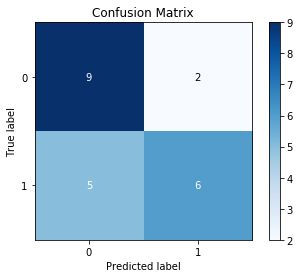

In [181]:
#skplt.metrics.plot_confusion_matrix(Y_test,O)
skplt.metrics.plot_confusion_matrix(Y_test,O)
plt.show()

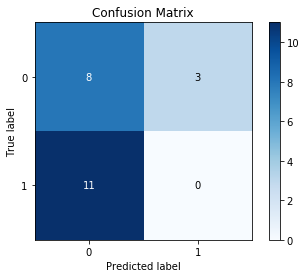

In [185]:
skplt.metrics.plot_confusion_matrix(Y_test,O2)
plt.show()

In [182]:
pr = L.predict_proba(X_test[features])[:,1]
fpr,tpr,threshold = metrics.roc_curve(Y_test,pr)
roc_auc = metrics.auc(fpr,tpr)

In [183]:
pr2 = L2.predict_proba(X_test[features2])[:,1]
fpr2,tpr2,threshold = metrics.roc_curve(Y_test,pr2)
roc_auc2 = metrics.auc(fpr2,tpr2)

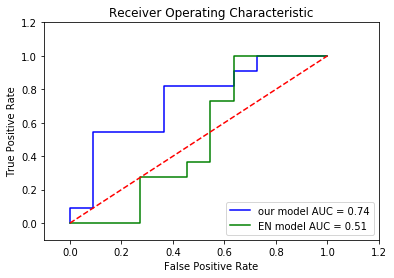

In [184]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='our model AUC = %0.2f'% roc_auc)
plt.plot(fpr2, tpr2, 'g',
label='EN model AUC = %0.2f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

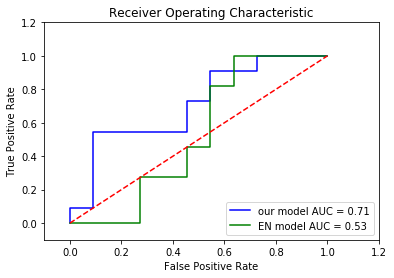

In [72]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='our model AUC = %0.2f'% roc_auc)
plt.plot(fpr2, tpr2, 'g',
label='EN model AUC = %0.2f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
precision, recall, thresholds = precision_recall_curve(Y_test,pr)
AP=metrics.average_precision_score(Y_test,pr)

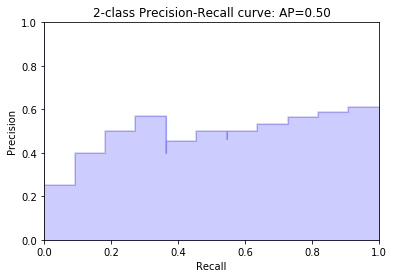

In [49]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
#plt.plot(recall/(recall+precision),'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          AP))
plt.show()

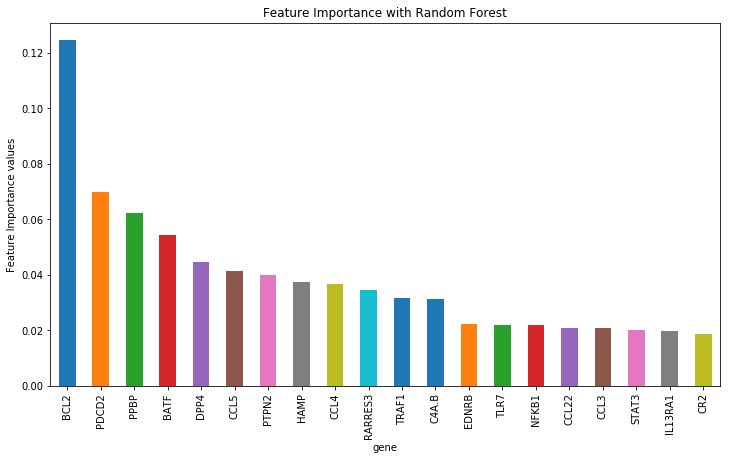

In [50]:
imp_feat_rf = pd.Series(L.feature_importances_, index=features).sort_values(ascending=False)
imp_feat_rf[:20].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
#plt.savefig('FeatImportance.png')
plt.show()

In [51]:
f2 = open('/data/users/gb/Asan/survival/random_selection-feature/nano_GEO_random_feature_selection_results_pCR_1000_smote_split_EN.txt','w')

In [52]:
for i in range(1000) :  # pCR 경우
    o = []    
    features2 = np.random.choice(d2.columns,9,replace = False) 
    #CV_random.fit(X_over[features],Y_over)    
    L = CV_random.best_estimator_
    L.fit(X_over[features2],Y_over)
    O = L.predict(X_test[features2])    
    cm = metrics.confusion_matrix(Y_test,O)
    pr = L.predict_proba(X_test[features2])[:,1] 
    fpr,tpr,threshold = metrics.roc_curve(Y_test,pr)    
    roc_auc = metrics.auc(fpr,tpr)    
    precision, recall, thresholds = precision_recall_curve(Y_test,pr)    
    AP = metrics.average_precision_score(Y_test,pr) 
    
    o.append(["feature =",features2,"AUC =",str(roc_auc),'AP =',str(AP), 'PPV =', str(cm[1,1]/(cm[1,0]+cm[1,1])) ]) # pCR    
    f2.write(str(o) + '\n')

/data/users/gb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/data/users/gb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/data/users/gb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/data/users/gb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/data/users/gb/anaconda3/lib/python3.7/site-packages/ipy

In [53]:
f2.close()

In [ ]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [ ]:
dotfile = six.StringIO()
i_tree = 0
col = features

In [ ]:
for tree_in_forest in L.estimators_:
    export_graphviz(tree_in_forest,out_file='/data/users/gb/Asan/survival/tree_plot/pCR/nano_pCR_tree.dot',
                    feature_names=col,
                    filled=True,
                    rounded=True)
    
    (graph,) = pydot.graph_from_dot_file('/data/users/gb/Asan/survival/tree_plot/pCR/nano_pCR_tree.dot')
    
    name = '/data/users/gb/Asan/survival/tree_plot/pCR/nano_pCR_tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1